In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn import datasets
%matplotlib inline

## Loading data

In [2]:
data = datasets.fetch_california_housing(as_frame = True)


In [3]:
pdData = pd.DataFrame(data.data, columns = data.feature_names)

In [4]:
pdData['target'] = pd.Series(data.target)

In [5]:
pdData.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
pdData.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [7]:
pdData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
pdData.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [9]:
pdData.shape

(20640, 9)

In [10]:
X = pdData.drop("target", axis = 1)
y = pdData["target"]

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
print(X)

[[ 2.34476576  0.98214266  0.62855945 ... -0.04959654  1.05254828
  -1.32783522]
 [ 2.33223796 -0.60701891  0.32704136 ... -0.09251223  1.04318455
  -1.32284391]
 [ 1.7826994   1.85618152  1.15562047 ... -0.02584253  1.03850269
  -1.33282653]
 ...
 [-1.14259331 -0.92485123 -0.09031802 ... -0.0717345   1.77823747
  -0.8237132 ]
 [-1.05458292 -0.84539315 -0.04021111 ... -0.09122515  1.77823747
  -0.87362627]
 [-0.78012947 -1.00430931 -0.07044252 ... -0.04368215  1.75014627
  -0.83369581]]


In [13]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

In [14]:
corr = pdData.corr()

<AxesSubplot: >

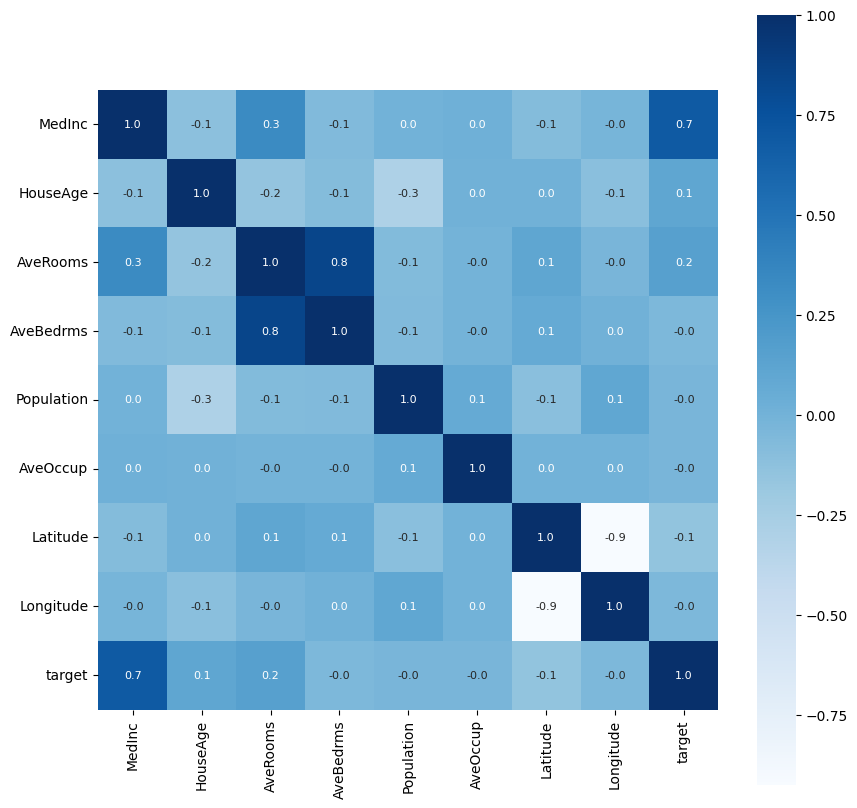

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={"size":8}, cmap="Blues")

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state =2)

In [17]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


In [18]:
model = XGBRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [19]:
mse = metrics.mean_squared_error(pred, y_test)
rmse = np.sqrt(mse)
score = metrics.r2_score(pred,y_test)
print("MSE: ", mse, "RMSE: ",rmse, "R2 Score: ",score)

MSE:  0.21375426338438436 RMSE:  0.4623356609481734 R2 Score:  0.8180337278424478


# without standandardizing the data

In [20]:
X_nostand = pdData.drop("target", axis = 1)
y_nostand = pdData["target"]
nostand_X_train, nostand_X_test, nostand_y_train, nostand_y_test = train_test_split(X_nostand, y_nostand, test_size=0.2, random_state=2)

In [21]:
model2 = XGBRegressor()
model2.fit(nostand_X_train, nostand_y_train)
pred2 = model2.predict(nostand_X_test)
mse2 = metrics.mean_squared_error(pred2, nostand_y_test)
rmse2 = np.sqrt(mse2)
score2 = metrics.r2_score(pred2,nostand_y_test)
print("MSE2: ", mse2, "RMSE2: ",rmse2, "R2 Score2: ",score2)

MSE2:  0.21378564728069277 RMSE2:  0.4623696002990387 R2 Score2:  0.8180341276965707
